In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min
import networkx as nx
import plotly.subplots as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

pio.templates.default = 'seaborn'

In [2]:
df = pd.read_csv('electric_car_data.csv')

In [3]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,price
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,True,AWD,Type 2 CCS,Sedan,D,5,508640640
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,False,RWD,Type 2 CCS,Hatchback,C,5,275040000
2,Polestar,2,4.7,210,400,181,620,True,AWD,Type 2 CCS,Liftback,D,5,517441920
3,BMW,iX3,6.8,180,360,206,560,True,RWD,Type 2 CCS,SUV,D,5,623790720
4,Honda,e,9.5,145,170,168,190,True,RWD,Type 2 CCS,Hatchback,B,4,302516496


In [4]:
df.isnull().sum()/len(df)*100

Brand              0.0
Model              0.0
AccelSec           0.0
TopSpeed_KmH       0.0
Range_Km           0.0
Efficiency_WhKm    0.0
FastCharge_KmH     0.0
RapidCharge        0.0
PowerTrain         0.0
PlugType           0.0
BodyStyle          0.0
Segment            0.0
Seats              0.0
price              0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    bool   
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  price            103 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.7+ KB


In [6]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,price
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,5.116804e+08
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,3.129466e+08
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,1.845427e+08
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,3.156497e+08
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,4.125600e+08
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,5.959200e+08
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,1.971120e+09


In [7]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f"{col}: {df[col].unique()}")

Brand: ['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
Model: ['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportback 55 quattro' 'CITIGOe iV '
 'Mii

In [8]:
def draw_cat_distribution(feature):
    counts = df[feature].value_counts()
    trace1 = go.Bar(
        x=counts.index,
        y=counts.values,
        marker=dict(color=px.colors.qualitative.Bold),
        name=feature,
        text=counts.values
    )
    trace2 = go.Pie(
        labels=counts.index,
        values=counts.values,
        marker=dict(colors=px.colors.qualitative.Bold),
        name=feature,
        textinfo='label+percent'
    )

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar Chart', 'Pie Chart'), specs=[[{'type': 'xy'}, {'type': 'domain'}]])

    fig.add_trace(trace1,row=1,col=1)
    fig.add_trace(trace2,row=1,col=2)

    fig.update_layout(
        title_text=f"Distribution of {feature}",
        title_x=0.5,
        title_font=dict(family="Arial, sans-serif", size=24, color="white"),
        xaxis_title=feature,
        yaxis_title='Count',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        template='plotly_dark'
    )
    fig.show()

In [9]:
for feature in ['RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats']:
    draw_cat_distribution(feature)

In [10]:
def draw_distribution(feature):
    # Density curve using seaborn
    density = sns.kdeplot(df[feature], bw_adjust=0.5)
    x_vals = density.get_lines()[0].get_xdata()
    y_vals = density.get_lines()[0].get_ydata()
    plt.close()

    fig_age = px.histogram(df, x=feature, nbins=25, marginal='box',
                        title=f"{feature} Distribution",
                        color_discrete_sequence=['#1f77b4'],
                        template='plotly_dark'
                        )
    fig_age.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals * len(df) * np.diff(np.histogram(df[feature], bins=25)[1])[0],
        mode='lines', line=dict(color='orange'), name='Density Curve'))

    fig_age.update_layout(
        title_x=0.5,
        xaxis_title=feature,
        yaxis_title='Count',
        title_font=dict(family="Arial, sans-serif", size=24),
        bargap=0.1
    )
    fig_age.show()

In [11]:
for feature in ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH','price']:
    draw_distribution(feature)

### Feature Correlation Heatmap
To understand the relationships between different numerical features

In [12]:
cols = [col for col in df.columns if df[col].dtype!='object']
corr = df[cols].corr()

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='Cividis',
    text=np.round(corr.values,2),
    texttemplate="%{text}"
))
fig.update_layout(
    title="Correlation Heatmap",
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue')
)
fig.show()

### Price Distribution by Brand
This analysis will help identify which brands target different income groups based on the price of their models.

In [13]:
fig = px.box(df, x='Brand', y='price', title='Price Distribution by Brand',
            labels={'price': 'Price (INR)', 'Brand': 'EV Brand'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

### Speed and Brand

In [14]:
fig = px.box(df, x='Brand', y='TopSpeed_KmH', title='Speed Distribution By Brand',
            labels={'x':'Car Brands','y':'Top Speed Km/H'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

In [15]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Top speed by Brand',
            labels = {'x':'Car Brands','y':'Top Speed (Km/H)'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',
            color='darkblue'),showlegend=False)
fig.show()

### Acceleration and Brand

In [16]:
fig = px.box(df, x='Brand', y='AccelSec', title='Acceleration Distribution By Brand',
            labels={'x':'Accelaration','y':'Car Brands'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

In [17]:
fig = px.bar(df,x='Brand',y = 'AccelSec',color = 'Brand',title = 'Acceleration by Brand',
            labels = {'x':'Accelaration','y':'Car Brands'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',
                    color='darkblue'),showlegend=False)
fig.show()

### Fast Charging Capability by Brand
Analyzing the fast charging capabilities can be crucial for users looking for quick charging options

In [18]:
fig = px.box(df, x='Brand', y='FastCharge_KmH', title='Fast Charging Distribution by Brand',
            labels={'FastCharge_KmH': 'Fast Charge (Km/H)', 'Brand': 'EV Brand'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

In [19]:
fig = px.bar(df,x='Brand',y = 'FastCharge_KmH',color = 'Brand',title = 'Fast Charging Capability by Brand',
            labels = {'FastCharge_KmH': 'Fast Charge (Km/H)', 'Brand': 'EV Brand'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',
                    color='darkblue'),showlegend=False)
fig.show()

### Rapid Charging Availability
Number of models with and without rapid charging capabilities.

In [20]:
fig = px.bar(df, x='Brand', color='RapidCharge', barmode='group', 
            title='Rapid Charging Availability by Brand',
            labels={'RapidCharge': 'Rapid Charge Available', 'count': 'Count'})
fig.update_layout(xaxis_tickangle=-45,title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

### Range and Efficiency
It helps in understanding the trade-off between range and efficiency of different EVs.

In [21]:
fig = px.scatter(df, x='Range_Km', y='Efficiency_WhKm', color='Brand', 
                title='Range vs Efficiency',
                labels={'Range_Km': 'Range (Km)', 'Efficiency_WhKm': 'Efficiency (Wh/Km)'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',
                    color='darkblue'))
fig.show()

### Top Speed and Acceleration
It helps in understanding performance-oriented segments by comparing top speed and acceleration

In [22]:
fig = px.scatter(df, x='TopSpeed_KmH', y='AccelSec', color='Brand', 
                title='Top Speed vs Acceleration',
                labels={'TopSpeed_KmH': 'Top Speed (Km/h)', 'AccelSec': 'Acceleration'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

### Acceleration Distribution by Body Style
To understand the performance characteristics of different body styles

In [23]:
fig = px.box(df, x='BodyStyle', y='AccelSec', color='BodyStyle', 
            title='Acceleration Distribution by Body Style',
            labels={'AccelSec': 'Acceleration (0-100 km/h in sec)', 'BodyStyle': 'Body Style'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

### Price vs Seats Analysis
To understand how seating capacity affects the pricing of EVs.

In [24]:
fig = px.scatter(df, x='Seats', y='price', color='Brand', title='Price vs Seats',
                labels={'Seats': 'Number of Seats', 'price': 'Price (INR)'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

### Price Vs Range
It helps in identifying value-for-money propositions

In [25]:
fig = px.scatter(df, x='Range_Km', y='price', color='Brand', 
                title='Price vs Range',
                labels={'Range_Km': 'Range (Km)', 'price': 'Price (INR)'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'))
fig.show()

### Efficiency vs. Price Analysis
To identify which brands offer the best efficiency for the price

In [26]:
fig = px.scatter(df, x='Efficiency_WhKm', y='price', color='Brand', 
                title='Efficiency vs Price',
                labels={'Efficiency_WhKm': 'Efficiency (Wh/Km)', 'price': 'Price (INR)'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

### Brand and Model Analysis

In [27]:
brand_model_counts = df.groupby('Brand')['Model'].count().reset_index()
brand_model_counts.columns = ['Brand', 'ModelCount']

fig = px.bar(brand_model_counts, x='Brand', y='ModelCount', title='Number of Models per Brand',
        labels={'ModelCount': 'Number of Models', 'Brand': 'EV Brand'}, color='Brand',text='ModelCount')
fig.update_layout(
        xaxis_tickangle=-45,
        title_x=0.5,
        title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
        showlegend=False)
fig.show()


### Market Share by Brand

In [28]:
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

fig = px.bar(brand_counts, x='Brand', y='Count', color='Brand', text='Count', title='Market Share By Brand')
fig.update_layout(
        xaxis_tickangle=-45,
        title_x=0.5,
        title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
        showlegend=False)
fig.show()

## Segment Analysis

### Distribution of Segments by Body Style

In [29]:
fig = px.histogram(df, x='Segment', color='BodyStyle', 
        title='Distribution of Segments by Body Style',
        labels={'Segment': 'Segment', 'count': 'Count'})
fig.update_layout(
        title_x=0.5,
        title_font=dict(family="Arial, sans-serif", size=24, color="darkblue")
)
fig.show()

### Top Speed Distribution by Segment

In [30]:
fig = px.box(df, x='Segment', y='TopSpeed_KmH', color='Segment', 
            title='Top Speed Distribution by Segment',
            labels={'TopSpeed_KmH': 'Top Speed (Km/h)', 'Segment': 'Market Segment'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

### Price Distribution by Body Style and Segment
It can reveal insights into market positioning

In [31]:
fig = px.box(df, x='BodyStyle', y='price', color='Segment', 
            title='Price Distribution by Body Style and Segment',
            labels={'price': 'Price (INR)', 'BodyStyle': 'Body Style', 'Segment': 'Segment'})
fig.update_layout(title_x=0.5,title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'))
fig.show()

### PCA

In [32]:
pca_cols = ['AccelSec', 'TopSpeed_KmH','FastCharge_KmH', 'RapidCharge', 'Range_Km', 'Efficiency_WhKm', 'Seats', 'price']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[pca_cols])

pca = PCA(n_components=8)
principal_components = pca.fit_transform(features_scaled)

In [33]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Summary of PCA
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(explained_variance),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance_ratio
})
summary_df

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,2.072607,0.531749,0.531749
1,1.068187,0.141243,0.672992
2,1.001788,0.124229,0.797222
3,0.799304,0.079085,0.876307
4,0.611906,0.046349,0.922657
5,0.508079,0.031955,0.954611
6,0.500574,0.031018,0.985629
7,0.340725,0.014371,1.000000


1st Principal Component alone explains around 53% of the variance

In [34]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=pca_cols, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
loadings_df = loadings_df.round(2)

In [35]:
fig = go.Figure(data=go.Heatmap(
    z=loadings_df.values,
    x=loadings_df.columns,
    y=loadings_df.index,
    colorscale='Cividis',
    text=loadings_df.values,
    texttemplate="%{text}"
))
fig.update_layout(
    title="PCA Loadings Heatmap",
    xaxis_title="Principal Components",
    yaxis_title="Features",
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue')
)
fig.show()

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    mode='markers',
    marker=dict(size=8, opacity=0.6),
    name='Data Points'
))
for i, feature in enumerate(pca_cols):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0] * 4],
        y=[0, loadings[i, 1] * 4],
        mode='lines+text',
        text=[None, feature],
        textposition='top right',
        line=dict(color='red', width=2),
        name=feature
    ))
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='PCA Biplot',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'),
    showlegend=False
)
fig.show()

In [37]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8'])

df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']

### Optimal Number of Clusters

In [38]:
# Elbow method for KMeans clustering
within_cluster_sums = []
for n_clusters in range(1, 7):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    clusterer.fit(df[pca_cols])
    within_cluster_sums.append(clusterer.inertia_)

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, 7)),
    y=within_cluster_sums,
    mode='lines+markers',
    marker=dict(size=8, color='blue'),
    line=dict(color='blue'),
    name='Within-cluster sum of squares'
))

fig.update_layout(
    xaxis_title='Number of clusters',
    yaxis_title='Sum of within-cluster distances',
    title='Elbow Method for KMeans Clustering (SCREE Plot)',
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue')
)
fig.show()

Optimal number of clusters would be 3 or 4

### SLSA Plot

In [40]:
# Similarity matrix function
def calculate_similarity(cluster_labels1, cluster_labels2):
    n_clusters1 = len(np.unique(cluster_labels1))
    n_clusters2 = len(np.unique(cluster_labels2))
    similarity_matrix = np.zeros((n_clusters1, n_clusters2))
    for i in range(n_clusters1):
        for j in range(n_clusters2):
            common_elements = np.sum((cluster_labels1 == i) & (cluster_labels2 == j))
            similarity_matrix[i, j] = common_elements
    return similarity_matrix / np.sum(similarity_matrix)

# Segment Level Stability Across Solutions (SLSA) plot
cluster_labels_list = []
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    kmeans.fit(df[pca_cols])
    cluster_labels_list.append(kmeans.labels_)
similarity_matrices = []
for i in range(len(cluster_labels_list) - 1):
    similarity_matrices.append(calculate_similarity(cluster_labels_list[i], cluster_labels_list[i + 1]))

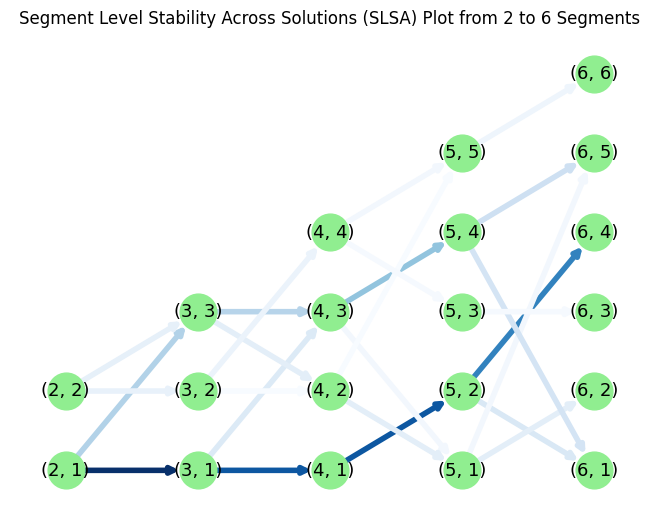

In [41]:
G = nx.DiGraph()
for i in range(len(cluster_labels_list) - 1):
    for j in range(cluster_labels_list[i].max() + 1):
        for k in range(cluster_labels_list[i + 1].max() + 1):
            weight = similarity_matrices[i][j, k]
            if weight > 0:
                G.add_edge((i+2, j + 1), (i + 3, k + 1), weight=weight)
pos = {}
for i in range(len(cluster_labels_list)):
    pos.update({(i+2, j + 1): (i, j + 1) for j in range(cluster_labels_list[i].max() + 1)})
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, node_color='lightgreen', with_labels=True, node_size=700, font_size=13, edge_color=weights, edge_cmap=plt.cm.Blues, width=4.0)
plt.title('Segment Level Stability Across Solutions (SLSA) Plot from 2 to 6 Segments')
plt.show()

## K-Means Clustering

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', title='K-Means Clustering of EV Features',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}, opacity=0.8)
fig.update_layout(
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue')
)
fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

### K-Means Clustering Analysis

In [43]:
fig = px.scatter_matrix(df, dimensions=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'price'],
                        color='Cluster', title='K-Means Clustering Analysis', opacity=0.9,
                        labels={'AccelSec': 'Acceleration (km/h)', 'TopSpeed_KmH': 'Top Speed (Km/h)', 
                                'Range_Km': 'Range (Km)', 'Efficiency_WhKm': 'Efficiency (Wh/Km)', 'price': 'Price (INR)'})
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'),
    height=1000
)
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()


### K-Means Cluster Level Stability

In [44]:
# Cluster stability
_, distances = pairwise_distances_argmin_min(df[pca_cols], kmeans.cluster_centers_)
similarities = 1 - (distances / distances.max())
data = [similarities[df['Cluster'] == i] for i in range(n_clusters)] # similarities of each cluster

fig = go.Figure()
for i in range(n_clusters):
    fig.add_trace(go.Box(
        y=data[i],
        name=f'Cluster {i + 1}',
        boxmean=True))
fig.update_layout(
    title='Cluster Level Stability within Solutions',
    xaxis_title='Cluster number',
    yaxis_title='Cluster stability',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    xaxis=dict(tickvals=[i for i in range(n_clusters)], ticktext=[f'Cluster {i + 1}' for i in range(n_clusters)]),)
fig.show()


### Segment Profile Plot for K-Means Clustering

In [45]:
pca_cols

['AccelSec',
 'TopSpeed_KmH',
 'FastCharge_KmH',
 'RapidCharge',
 'Range_Km',
 'Efficiency_WhKm',
 'Seats',
 'price']

In [46]:
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_props = cluster_sizes / len(df)
means = df.groupby('Cluster')[pca_cols].mean()

fig = sp.make_subplots(rows=2, cols=4, 
                        subplot_titles=['Acceleration (km/h)', 'Top Speed (Km/h)', 'Fast Charge', 'Rapid Charge',
                        'Range (Km)', 'Efficiency (Wh/Km)', 'Seats', 'Price (INR)'], 
                       horizontal_spacing=0.07, vertical_spacing=0.15)

colors = px.colors.qualitative.Plotly 
for idx, feature in enumerate(pca_cols):
    feature_data = means[feature]
    
    fig.add_trace(go.Bar(
        y=[f'Cluster {i+1}' for i in range(n_clusters)],
        x=feature_data,
        orientation='h',
        marker=dict(color=colors[:n_clusters]),
        text=np.round(feature_data,2),
        textposition='outside'
    ), row=(idx // 4 + 1), col=(idx % 4 + 1))
    
fig.update_layout(
    title_text=f'Segment Profile Plot for the K-Means Clustering Solution',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    xaxis6_title='Mean Value',
    height=600,
    showlegend=False
)
fig.show()

In [47]:
fig = sp.make_subplots(rows=4, cols=2, 
                       subplot_titles=['Acceleration (km/h)', 'Top Speed (Km/h)', 'Fast Charge', 'Rapid Charge',
                        'Range (Km)', 'Efficiency (Wh/Km)', 'Seats', 'Price (INR)'], 
                       horizontal_spacing=0.2, vertical_spacing=0.07
                       )

for idx, feature in enumerate(pca_cols):
    row = idx // 2 + 1
    col = idx % 2 + 1
    
    for cluster_num in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster_num][feature]
        
        fig.add_trace(go.Box(
            y=cluster_data,
            name=f'Cluster {cluster_num + 1}',
            boxmean='sd',
            marker=dict(color=px.colors.qualitative.Plotly[cluster_num]),
        ), row=row, col=col)
    
    fig.update_yaxes(title_text=feature, row=row, col=col)

fig.update_layout(
    title_text='Box Plots of Features by Cluster',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    height=1200,
    showlegend=False
)
fig.show()

In [48]:
colors = ['green','black' , 'darkorange','blue']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    mode='markers',
    marker=dict(size=8, opacity=0.6, color=[colors[cluster] for cluster in df['Cluster']]),
    name='Data Points',
    showlegend=False
))

for i, feature in enumerate(pca_cols):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0] * 4],
        y=[0, loadings[i, 1] * 4],
        mode='lines+text',
        text=[None, feature],
        textposition='top right',
        line=dict(color='red', width=2),
        name=feature,
        showlegend=False
    ))

fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='PCA Biplot',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue')
)

for cluster_num in range(4):
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=10, color=colors[cluster_num]),
        legendgroup='Clusters',
        showlegend=True,
        name=f'Cluster {cluster_num}'
    ))

fig.show()

In [49]:
# Cluster Profiling and Interpretation

for cluster_num in range(4):
    print(f'\nCluster {cluster_num + 1}:')
    cluster_data = df[df['Cluster'] == cluster_num][pca_cols]
    print(cluster_data.describe().round(2))


Cluster 1:
       AccelSec  TopSpeed_KmH  FastCharge_KmH  Range_Km  Efficiency_WhKm  \
count     19.00         19.00           19.00     19.00            19.00   
mean       9.94        149.05          299.47    247.89           173.68   
std        3.69         17.55          118.58    101.63            11.94   
min        5.00        130.00          200.00     95.00           153.00   
25%        8.00        135.00          205.00    175.00           165.50   
50%        9.50        150.00          250.00    250.00           171.00   
75%       11.50        160.00          365.00    322.50           180.50   
max       22.40        200.00          570.00    425.00           194.00   

       Seats         price  
count  19.00  1.900000e+01  
mean    4.47  3.037272e+08  
std     0.96  6.653657e+07  
min     2.00  1.960760e+08  
25%     4.00  2.700709e+08  
50%     5.00  3.037633e+08  
75%     5.00  3.430528e+08  
max     5.00  4.125600e+08  

Cluster 2:
       AccelSec  TopSpeed_KmH 

### DBSCAN Clustering

In [50]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map({-1:0, 0:1, 1:2})

fig = px.scatter(df, x='PC1', y='PC2', color='DBSCAN_Cluster', title='DBSCAN Clustering of EV Features',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 opacity=0.8)
fig.update_layout(
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue')
)
fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

In [51]:
fig = px.scatter_matrix(df, dimensions=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'price'],
                        color='DBSCAN_Cluster', title='DBSCAN Clustering Analysis', opacity=0.9,
                        labels={'AccelSec': 'Acceleration (km/h)', 'TopSpeed_KmH': 'Top Speed (Km/h)', 
                                'Range_Km': 'Range (Km)', 'Efficiency_WhKm': 'Efficiency (Wh/Km)', 'price': 'Price (INR)'})
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif',color='darkblue'),
    height=1000
)
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

### Segment Profile Plot for DBSCAN Clustering

In [52]:
df['DBSCAN_Cluster'].unique()

array([0, 1, 2], dtype=int64)

In [53]:
cluster_sizes = df['DBSCAN_Cluster'].value_counts().sort_index()
cluster_props = cluster_sizes / len(df)
means = df.groupby('DBSCAN_Cluster')[pca_cols].mean()

fig = sp.make_subplots(rows=2, cols=4, 
                        subplot_titles=['Acceleration (km/h)', 'Top Speed (Km/h)', 'Fast Charge', 'Rapid Charge',
                        'Range (Km)', 'Efficiency (Wh/Km)', 'Seats', 'Price (INR)'], 
                       horizontal_spacing=0.07, vertical_spacing=0.15)

colors = px.colors.qualitative.Plotly 
for idx, feature in enumerate(pca_cols):
    feature_data = means[feature]
    
    fig.add_trace(go.Bar(
        y=[f'Cluster {i+1}' for i in range(3)],
        x=feature_data,
        orientation='h',
        marker=dict(color=colors[:3]),
        text=np.round(feature_data,2),
        textposition='outside'
    ), row=(idx // 4 + 1), col=(idx % 4 + 1))
    
fig.update_layout(
    title_text=f'Segment Profile Plot for the DBSCAN Clustering Solution',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    xaxis6_title='Mean Value',
    height=600,
    showlegend=False
)
fig.show()

In [54]:
fig = sp.make_subplots(rows=4, cols=2, 
                       subplot_titles=['Acceleration (km/h)', 'Top Speed (Km/h)', 'Fast Charge', 'Rapid Charge',
                        'Range (Km)', 'Efficiency (Wh/Km)', 'Seats', 'Price (INR)'], 
                       horizontal_spacing=0.2, vertical_spacing=0.07
                       )

for idx, feature in enumerate(pca_cols):
    row = idx // 2 + 1
    col = idx % 2 + 1
    
    for cluster_num in range(3):
        cluster_data = df[df['DBSCAN_Cluster'] == cluster_num][feature]
        
        fig.add_trace(go.Box(
            y=cluster_data,
            name=f'Cluster {cluster_num + 1}',
            boxmean='sd',
            marker=dict(color=px.colors.qualitative.Plotly[cluster_num]),
        ), row=row, col=col)
    
    fig.update_yaxes(title_text=feature, row=row, col=col)

fig.update_layout(
    title_text='Box Plots of Features by Cluster',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    height=1200,
    showlegend=False
)
fig.show()

In [55]:
colors = ['green','blue' , 'darkorange']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    mode='markers',
    marker=dict(size=8, opacity=0.6, color=[colors[cluster] for cluster in df['DBSCAN_Cluster']]),
    name='Data Points',
    showlegend=False
))

for i, feature in enumerate(pca_cols):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0] * 4],
        y=[0, loadings[i, 1] * 4],
        mode='lines+text',
        text=[None, feature],
        textposition='top right',
        line=dict(color='red', width=2),
        name=feature,
        showlegend=False
    ))

fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='PCA Biplot',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue')
)

for cluster_num in range(3):
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=10, color=colors[cluster_num]),
        legendgroup='Clusters',
        showlegend=True,
        name=f'Cluster {cluster_num}'
    ))

fig.show()

In [56]:
# Cluster Profiling and Interpretation

for cluster_num in range(3):
    print(f'\nCluster {cluster_num + 1}:')
    print(df[df['DBSCAN_Cluster'] == 2][pca_cols].describe().round(2))


Cluster 1:
       AccelSec  TopSpeed_KmH  FastCharge_KmH  Range_Km  Efficiency_WhKm  \
count     58.00         58.00           58.00     58.00            58.00   
mean       7.57        168.78          397.59    319.40           185.74   
std        2.01         24.85          140.73     83.24            25.65   
min        3.80        130.00          170.00    170.00           153.00   
25%        6.05        150.00          260.00    250.00           168.00   
50%        7.50        160.00          415.00    327.50           178.50   
75%        9.00        180.00          507.50    378.75           194.00   
max       12.30        250.00          650.00    515.00           270.00   

       Seats         price  
count  58.00  5.800000e+01  
mean    4.83  4.272591e+08  
std     0.38  1.568326e+08  
min     4.00  1.845427e+08  
25%     5.00  3.201924e+08  
50%     5.00  3.746549e+08  
75%     5.00  5.247305e+08  
max     5.00  8.805864e+08  

Cluster 2:
       AccelSec  TopSpeed_KmH 

### Predictive Modeling with Gradient Boosting
Using Gradient Boosting to predict the price of EVs based on features

In [57]:
X = df[['AccelSec', 'TopSpeed_KmH', 'FastCharge_KmH', 'RapidCharge', 'Range_Km', 'Efficiency_WhKm', 'Seats']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

In [59]:
importances = gbr.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
importance_df['Importance'] = np.round(importance_df['Importance'],2)

fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance for Price Prediction',
            labels={'Feature': 'Feature', 'Importance': 'Importance'},text='Importance')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
)
fig.show()

## EV Market Analysis Dashboard

In [60]:
columns = ['BodyStyle', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'Brand', 'Seats']

In [61]:
app = dash.Dash(__name__)
app.title = 'EV Market Analysis'
app.layout = html.Div(style={'height': '100vh', 'overflow': 'hidden'}, children=[
    html.Div(style={'display': 'flex', 'flexDirection': 'row', 'height': '100%'}, children=[
        html.Div(style={'flex': '20%', 'backgroundColor': '#f0f2f5', 'padding': '20px', 
                        'boxSizing': 'border-box', 'overflowY': 'auto'}, children=[
            html.H2('Controls', style={'textAlign': 'center', 'color': '#007BFF', 'marginBottom': '20px'}),
            dcc.Dropdown(id='feature-dropdown',
                         options=[{'label': col, 'value': col} for col in columns],
                         value='BodyStyle',
                         style={'border': '1px solid #007BFF', 'borderRadius': '5px'}),
            html.Div(id='feature-description', style={'marginBottom': '20px', 'textAlign': 'center', 'padding': '10px', 
                                                      'fontSize': '16px', 'color': '#333'})
        ]),
        html.Div(style={'flex': '80%', 'padding': '20px', 'backgroundColor': '#ffffff', 'boxSizing': 'border-box',
                        'overflowY': 'auto'}, children=[
            html.H1('EV Market Analysis Dashboard', style={'textAlign': 'center', 'color': '#007BFF', 
                                                           'marginBottom': '30px'}),
            html.Div(style={'display': 'flex', 'flexDirection': 'row', 'justifyContent': 'space-between', 'height': 'calc(100% - 60px)'}, children=[
                html.Div(style={'flex': '48%'}, children=[
                    dcc.Graph(id='feature-scatter', config={'displayModeBar': False}, style={'height': '100%'})
                ]),
                html.Div(style={'flex': '48%'}, children=[
                    dcc.Graph(id='feature-histogram-pie', config={'displayModeBar': False}, style={'height': '100%'})
                ])
            ])
        ])
    ])
])

@app.callback(
    [Output('feature-scatter', 'figure'),
     Output('feature-histogram-pie', 'figure'),
     Output('feature-description', 'children')],
    [Input('feature-dropdown', 'value')]
)
def update_graphs(selected_feature):
    colors = px.colors.qualitative.Plotly
    # Scatter plot between Price and selected feature
    scatter_fig = px.scatter(df, x='price', y=selected_feature, color='Segment',
                             title=f'Price vs {selected_feature}',
                             labels={'price': 'Price (INR)', selected_feature: selected_feature},
                             color_discrete_sequence=colors)
    scatter_fig.update_layout(
        title_x=0.5,
        title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
        xaxis=dict(title='Price (INR)', title_font=dict(size=18, color='darkblue')),
        yaxis=dict(title=selected_feature, title_font=dict(size=18, color='darkblue')),
        showlegend=False
    )

    # Determine if the selected feature is numeric or categorical
    if pd.api.types.is_numeric_dtype(df[selected_feature]):
        histogram_fig = px.histogram(df, x=selected_feature, color='Segment',
                                     title=f'Distribution of {selected_feature}',
                                     labels={selected_feature: selected_feature},
                                     color_discrete_sequence=colors)
        histogram_fig.update_layout(
            title_x=0.5,
            title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
            xaxis=dict(title=selected_feature, title_font=dict(size=18, color='darkblue')),
            yaxis=dict(title='Count', title_font=dict(size=18, color='darkblue')),
            legend=dict(title='Segment', title_font=dict(size=18, color='darkblue')),
            bargap=0.1)
    else:
        pie_fig = px.pie(df, names=selected_feature, color='Segment',
                         title=f'Distribution of {selected_feature}',
                         color_discrete_sequence=colors)
        pie_fig.update_layout(
            title_x=0.5,
            title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
            legend=dict(title='Segment', title_font=dict(size=18, color='darkblue')))

        histogram_fig = pie_fig

    description = f"Currently displaying the relationship between Price and {selected_feature}, and the distribution of {selected_feature} across different EV segments."

    return scatter_fig, histogram_fig, description

if __name__ == '__main__':
    app.run_server(debug=True)